## MobileNetv2 from Keras

First we need to import used libraries:

In [1]:
import tensorflow as tf, matplotlib.pyplot as plt, numpy as np, os
from keras.utils import plot_model
from helper.prepare_data import prepare_data

First, we pick the dataset that we would like to use from:
<br>1 - Age, gender, ethnicity CSV
<br>2 - UTKFace
<br>3 - Fairface

In [2]:
choice = 2
colour = True

Prepare data from each dataset so that we end up with normalized pixels and labels:

In [3]:
x, y_age, y_gender, y_ethnicity, img_size = prepare_data(choice = choice, colour = colour)

Display some exemplary images:

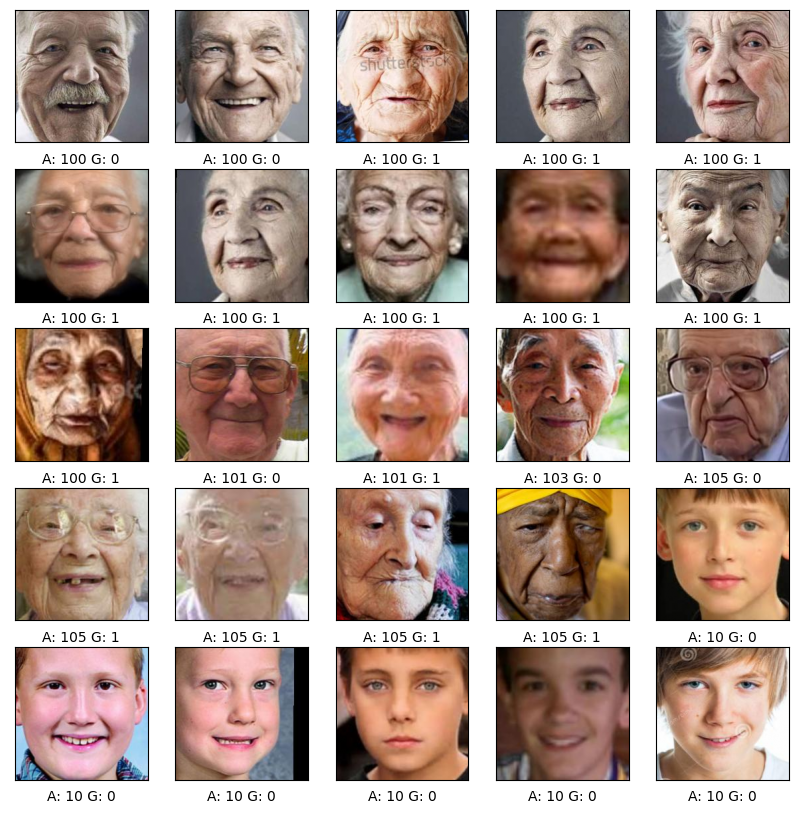

In [4]:
# size of the whole grid of images
plt.figure(figsize=(10, 10))

# display first 25 images in a 5x5 grid
for i in range(0, 25):
    plt.subplot(5, 5, (i % 25) + 1)
    plt.grid(False)
    #disable x and y axis description
    plt.xticks([])
    plt.yticks([])
    if colour:
        plt.imshow(x[i].reshape(img_size, img_size, 3), cmap='gray')
    else:
        plt.imshow(x[i].reshape(img_size, img_size), cmap='gray')
    # A = age, G = gender, E = ethnicity
    plt.xlabel("A: "+ str(y_age[i]) + " G: " + str(y_gender[i]) + (" E: " + str(y_ethnicity[i]) if y_ethnicity.size > 0 else ""))
plt.show()

MobileNet implementation:

In [5]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (img_size, img_size, 3), include_top = False, weights = 'imagenet')
base_model.trainable = False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
gender_prediction_layer = tf.keras.layers.Dense(1, activation = 'sigmoid')
age_prediction_layer = tf.keras.layers.Dense(1, activation = 'relu')

model_gender = tf.keras.Sequential([
  base_model,
  global_average_layer,
  gender_prediction_layer
])

model_gender.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy', 'mae'])
model_gender.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [6]:
model_age = tf.keras.Sequential([
  base_model,
  global_average_layer,
  age_prediction_layer
])

model_age.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001), loss = 'mse', metrics = ['accuracy', 'mae'])
model_age.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_1 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


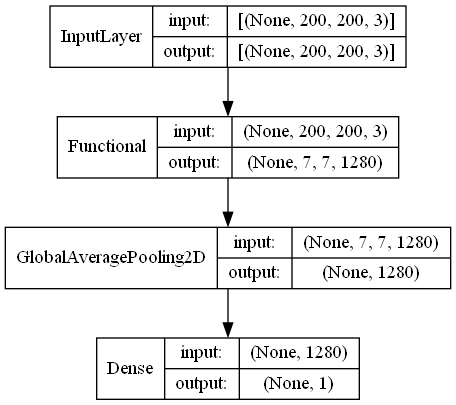

In [7]:
plot_model(model_age, to_file = os.getcwd() + '//images//models//mobilenetv2_model.png', show_shapes = True, show_dtype = False, show_layer_names = False, rankdir = 'TB', expand_nested = False, dpi = 96)

In [15]:
history = model_age.fit(x, y_age, epochs = 20, validation_split = 0.2)

Epoch 1/20
593/593 [==============================] - 363s 606ms/step - loss: 135.8057 - accuracy: 0.0556 - mae: 8.7897 - val_loss: 915.5212 - val_accuracy: 0.0000e+00 - val_mae: 27.4071
Epoch 2/20
593/593 [==============================] - 309s 521ms/step - loss: 91.0823 - accuracy: 0.0423 - mae: 7.2735 - val_loss: 797.3512 - val_accuracy: 0.0000e+00 - val_mae: 25.4053
Epoch 3/20
593/593 [==============================] - 303s 511ms/step - loss: 86.4920 - accuracy: 0.0373 - mae: 7.0679 - val_loss: 837.8775 - val_accuracy: 0.0000e+00 - val_mae: 25.9629
Epoch 4/20
593/593 [==============================] - 294s 496ms/step - loss: 83.8930 - accuracy: 0.0352 - mae: 6.9383 - val_loss: 828.6766 - val_accuracy: 0.0000e+00 - val_mae: 25.7807
Epoch 5/20
593/593 [==============================] - 289s 488ms/step - loss: 81.9258 - accuracy: 0.0337 - mae: 6.8483 - val_loss: 803.7437 - val_accuracy: 0.0000e+00 - val_mae: 25.3605
Epoch 6/20
593/593 [==============================] - 271s 457ms/step

<Figure size 640x480 with 0 Axes>

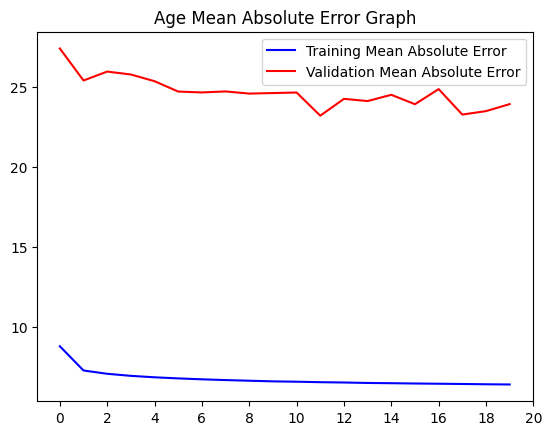

<Figure size 640x480 with 0 Axes>

In [17]:
age_acc = history.history['mae']
age_val_acc = history.history['val_mae']
epochs = range(len(age_acc))

plt.plot(epochs, age_acc, 'b', label='Training Mean Absolute Error')
plt.plot(epochs, age_val_acc, 'r', label='Validation Mean Absolute Error')
plt.title('Age Mean Absolute Error Graph')
plt.xticks(np.arange(min(epochs), max(epochs)+2, 2.0))
plt.legend()
plt.savefig(os.getcwd() + '//images//plots//mobilenet_age_mae_ds_' + str(choice), bbox_inches='tight')
plt.figure()

<Figure size 640x480 with 0 Axes>

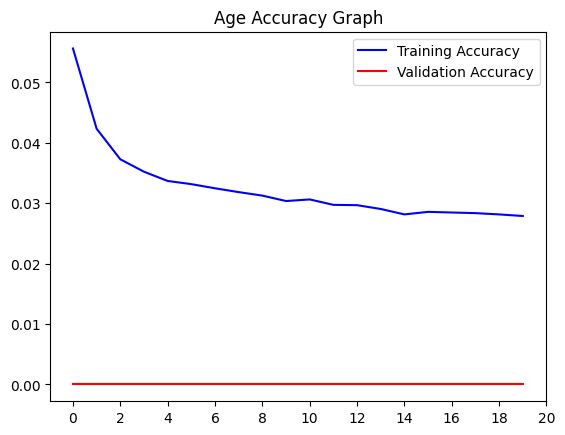

<Figure size 640x480 with 0 Axes>

In [18]:
age_acc = history.history['accuracy']
age_val_acc = history.history['val_accuracy']
epochs = range(len(age_acc))

plt.plot(epochs, age_acc, 'b', label='Training Accuracy')
plt.plot(epochs, age_val_acc, 'r', label='Validation Accuracy')
plt.title('Age Accuracy Graph')
plt.xticks(np.arange(min(epochs), max(epochs)+2, 2.0))
plt.legend()
plt.savefig(os.getcwd() + '//images//plots//mobilenet_age_accuracy_ds_' + str(choice))
plt.figure()